# Modello di Ising 1-dimensionale #
In questa lezione abbiamo provato a simulare con metodi Montecarlo il modello di Ising, che trova ampio utilizzo in Meccanica Statistica. Per semplificare la trattazione, abbiamo considerato il modello di Ising 1-dimensionale, che non presenta transizioni di fase a temperatura non nulla. Abbiamo quindi una catena di spin che possono assumere solo valori $+1$ o $-1$. La catena è formata da $N=50$ spin, e sono applicate Periodic Boundary Conditions per evitare che gli spin estremali della catena presentino un comportamento differente da quello degli spin interni alla catena stessa. Ciascuno spin interagisce con i primi vicini, dando luogo ad una hamiltoniana di interazione della forma:
$$
H = 
-J\sum_{i=1}^N s_i s_{i+1}
-\frac{h}{2}\sum_{i=1}^N (s_i + s_{i+1}) 
$$
dove è stata inserita anche la dipendenza da un eventuale campo magnetico esterno $h$. Osservo che a temperatura nulla ci aspettiamo che la configurazione di "ground state" sia 2 volte degenere se la costante $J$ è positiva: tutti gli spin su o tutti gli spin giù. Invece, a temperatura infinita gli spin saranno disposti in maniera casuale.

## Considerazioni sull'equilibrazione ##
Il campionamento della distribuzione di Boltzmann per poter misurare le varie grandezze verrà effettuato sia con l'algoritmo Metropolis che con l'algoritmo di Gibbs. In ogni caso, prima di partire a campionare occorrerà equilibrare il sistema. Nel seguito, indicherò come "mossa Metropolis" o equivalentemente come "mossa Gibbs" il tentativo di cambiare <i>tutti</i> gli spin, ottenuto tramite un selettore casuale di spin che agisce un numero $N$ di volte. 

Vista questa definizione della mossa, ci aspettiamo che il tempo di equilibrazione (e anche il tempo di correlazione) sia molto breve. Per poter eseguire separatamente la fase di equilibrazione, predispongo il programma in modo da poter accettare in input una configurazione ottenuta da esecuzione precedente. In seguito, avvio il sistema da una configurazione di alta temperatura (spin disposti in modo completamente casuale) e faccio girare una prima volta il programma. La configurazione ottenuta alla fine (dopo $O(10^4)$ mosse!) sarà equilibrata. A questo punto, eseguo i conti successivi ripartendo da questa configurazione.

Nel seguito riporto i risultati delle misure ottenute per le variabili termodinamiche sul modello di Ising 1-dimensionale al variare della temperatura. Tutti i dati sono espressi nella forma in cui le due costanti principali (la costante di Boltzmann $k_B$ e il magnetone di Bohr $\mu_B$) sono poste uguali a 1. Inoltre, è possibile confrontare i risultati ottenuti con la soluzione analitica (che per il modello di Ising 1-dimensionale è fortunatamente disponibile).

## Energia interna ##
L'energia interna è definita come il valor medio dell'hamiltoniana, e qui normalizzo sul numero di spin (ottenendo così più precisamente una "energia interna per spin"). Quindi:
$$
\frac{U(N,T)}{N} = \frac{\langle H \rangle}{N}
= \frac{1}{N} \sum_{\{ s_i \}} H \frac{\exp \left( -\beta H\right)}{Z}
= -\frac{1}{N}\frac{\partial \ln Z}{\partial \beta}
\underset{h=0}= -J \tanh (\beta J) \Biggl( \frac{1 + \tanh^{N-2} (\beta J)}{1+\tanh^N (\beta J)} \Biggl)
$$

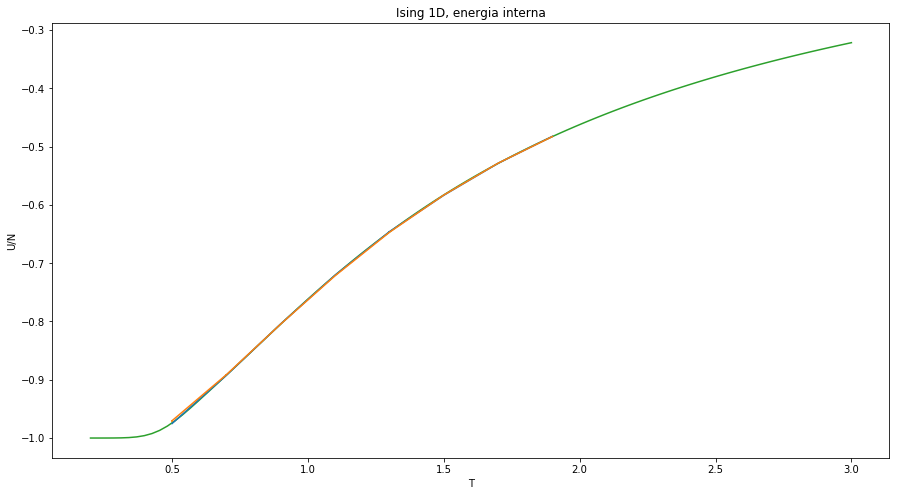

In [2]:
import numpy as np
import matplotlib.pyplot as plt
points=100
T = np.linspace(0.2,3.0,num=points)
beta = 1/T
J = 1.0
Ns = 50
th = np.tanh(J/T)
thN= th**Ns
ch = 1/th

fig=plt.figure(figsize=(15, 8))                     #sx: larghezza; dx: Lunghezza

x, f, error = np.loadtxt("energy_and_T_Metropolis.dat", usecols=(0,1,2), delimiter='   ', unpack='false')
plt.errorbar(x,f,yerr=error)

x2, f2, error2 = np.loadtxt("energy_and_T_Gibbs.dat", usecols=(0,1,2), delimiter='   ', unpack='false')
plt.errorbar(x2,f2,yerr=error2)

e = -J*( th + ch*thN )/( 1 + thN )
plt.plot(T, e)
plt.title('Ising 1D, energia interna')
plt.xlabel('T')
plt.ylabel('U/N')
plt.show()

Anche se si è scelto di non scendere a temperature troppo basse, dove l'algoritmo di Metropolis tende a lavorare molto male perché il sistema è pochissimo ergodico (e quindi Metropolis rifiuta praticamente tutte le mosse proposte) si osserva una praticamente perfetta sovrapposizione tra dati ottenuti dalla simulazione sia con Metropolis che con Gibbs e quelli previsti dalla teoria di Ising.

## Capacità termica, magnetizzazione, suscettività magnetica##
Il calore specifico è definito come 
$$
C(N,T)=k_B\beta^2 \left(\langle H^2 \rangle -\langle H \rangle^2 \right)
$$
cioè come una misura delle fluttuazioni all'equilibrio del valor medio dell'hamiltoniana. 

La magnetizzazione è presente solo in presenza di un campo magnetico esterno, che qui poniamo valere $h=0.02$. La magnetizzazione è semplicemente la somma degli spin all'equilibrio:
$$
M(N,T,h) =
\left\langle \sum_{i=1,N}s_i \right\rangle
$$
Anche qui, eseguo diverse misure di magnetizzazione al variare della temperatura. I valori ottenuti manifestano una ottima compatibilità con la curva teorica.

La suscettività magnetica è la funzione risposta del sistema ad una variazione del campo magnetico esterno. Per semplicità, misuro questa proprietà a campo esterno nullo, dove vale:
$$
\chi(N,T)=
\beta \left[ \left\langle \left( \sum_{i=1,N}s_i \right)^2 \right\rangle \right]
$$
Mostro di seguito i dati ottenuti, che sono ben compatibili con la curva teorica di Ising.

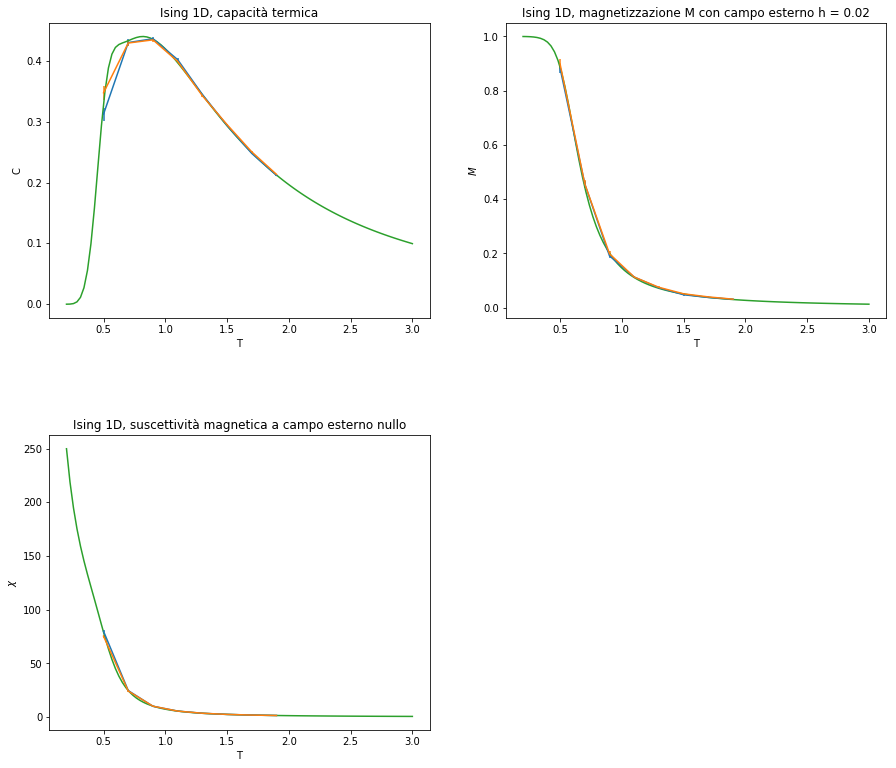

In [13]:
heat=((beta*J)**2)*(((1+thN+(Ns-1)*(th**2)+(Ns-1)*(ch**2)*thN)/(1+thN))-Ns*((th+ch*thN)/(1+thN))**2)

fig=plt.figure(figsize=(15, 13))                     #sx: larghezza; dx: Lunghezza
fig.subplots_adjust(hspace=0.4, wspace=0.2)

plt.subplot(2,2,1)
x, f, error = np.loadtxt("heat_and_T_Metropolis.dat", usecols=(0,1,2), delimiter='   ', unpack='false')
plt.errorbar(x,f,yerr=error)
x2, f2, error2 = np.loadtxt("heat_and_T_Gibbs.dat", usecols=(0,1,2), delimiter='   ', unpack='false')
plt.errorbar(x2,f2,yerr=error2)
plt.plot(T, heat)
plt.title('Ising 1D, capacità termica')
plt.xlabel('T')
plt.ylabel('C')

plt.subplot(2,2,2)
h=0.02 #external field
b = 1/T

l1 = np.exp(b*J)*np.cosh(b*h)+np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
l2 = np.exp(b*J)*np.cosh(b*h)-np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))
Z = l1**Ns + l2**Ns
M = (np.exp(b*J)*np.sinh(b*h)*((l1**(Ns-1))*(1+np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J))) 
        + (l2**(Ns-1))*(1-np.exp(b*J)*np.cosh(b*h)/np.sqrt(np.exp(2*b*J)*np.cosh(b*h)*np.cosh(b*h)-2*np.sinh(2*b*J)))))/(Z)

x, f, error = np.loadtxt("mag_and_T_Metropolis.dat", usecols=(0,1,2), delimiter='   ', unpack='false')
plt.errorbar(x,f,yerr=error)

x2, f2, error2 = np.loadtxt("mag_and_T_Gibbs.dat", usecols=(0,1,2), delimiter='   ', unpack='false')
plt.errorbar(x2,f2,yerr=error2)

plt.plot(T, M)
plt.title('Ising 1D, magnetizzazione M con campo esterno h = 0.02')
plt.xlabel('T')
plt.ylabel('$M$')

plt.subplot(2,2,3)
X = beta*np.exp(2*beta*J)*(1-thN)/(1+thN)
x, f, error = np.loadtxt("chi_and_T_Metropolis.dat", usecols=(0,1,2), delimiter='   ', unpack='false')
plt.errorbar(x,f,yerr=error)
x2, f2, error2 = np.loadtxt("chi_and_T_Gibbs.dat", usecols=(0,1,2), delimiter='   ', unpack='false')
plt.errorbar(x2,f2,yerr=error2)
plt.plot(T, X)
plt.title('Ising 1D, suscettività magnetica a campo esterno nullo')
plt.xlabel('T')
plt.ylabel('$\chi$')

plt.show()